# Language Identification in South African Text: Kaggle Competition

# Name: Hlakaniphile Thulile Zwane

My approach to the Language Identification Challenge that was held on Kaggle is detailed in this notebook which I have created. The purpose of the challenge is to properly categorise every material that has been produced in any of the 11 official languages of South Africa. Among the many processes that are included in the notebook are data exploration, preprocessing, feature extraction, model training, evaluation, and the development of submissions. By utilising techniques from the field of machine learning, my objective is to develop a classification model that is capable of accurately identifying the language of a text sample that has been provided.

## Importing Libraries

In [77]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB


## Loading of data

In [78]:
#reading the train set 
train_df = pd.read_csv('train_set.csv')
#reading the test set 
test_df = pd.read_csv('test_set.csv')

## Exploratory Data Analysis (EDA)

In [79]:
#displaying the first rows and last rows of the train dataset
print("Train Dataset:")
print(train_df.head())
print(train_df.tail)

Train Dataset:
  lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...
<bound method NDFrame.tail of       lang_id                                               text
0         xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1         xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2         eng  the province of kwazulu-natal department of tr...
3         nso  o netefatša gore o ba file dilo ka moka tše le...
4         ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...
...       ...                                                ...
32995     tsn  popo ya dipolateforomo tse ke go tlisa boetele...
32996     sot  modise mosadi na o ntse o sa utlwe hore thaban...
3299

In [80]:
#displaying the first rows and last rows of the test dataset
print("\nTest Dataset:")
print(test_df.head())
print(test_df.tail)


Test Dataset:
   index                                               text
0      1  Mmasepala, fa maemo a a kgethegileng a letlele...
1      2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2      3         Tshivhumbeo tshi fana na ngano dza vhathu.
3      4  Kube inja nelikati betingevakala kutsi titsini...
4      5                      Winste op buitelandse valuta.
<bound method NDFrame.tail of       index                                               text
0         1  Mmasepala, fa maemo a a kgethegileng a letlele...
1         2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2         3         Tshivhumbeo tshi fana na ngano dza vhathu.
3         4  Kube inja nelikati betingevakala kutsi titsini...
4         5                      Winste op buitelandse valuta.
...     ...                                                ...
5677   5678                   You mark your ballot in private.
5678   5679  Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679   5680  E Ka kopo etsa 

# Checking if there are null values


In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


### Analysis of the language distribution in the dataset and pie chart

8.0
8.0


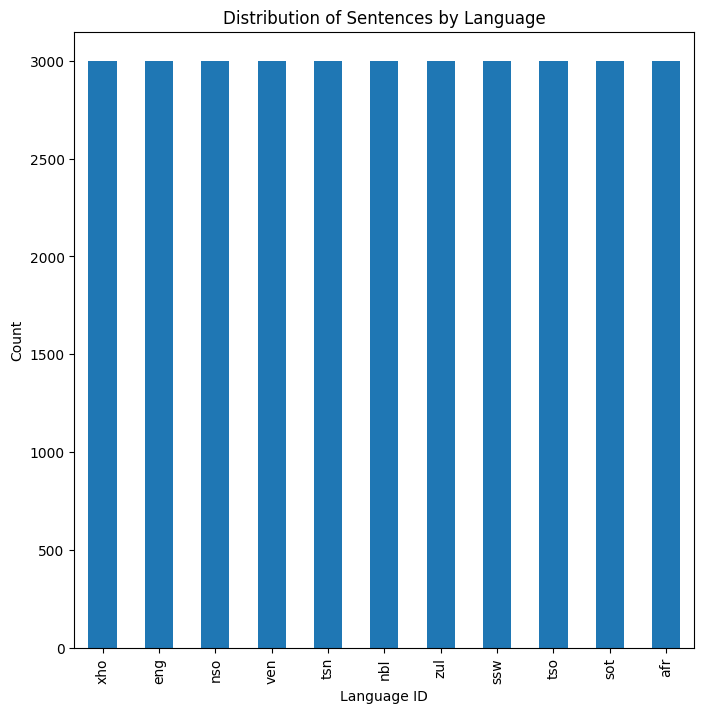

In [82]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 8
plt.rcParams["figure.figsize"] = plot_size 

# Distribution of sentences from the dataset
train_df.lang_id.value_counts().plot(kind='bar')
plt.title('Distribution of Sentences by Language')
plt.xlabel('Language ID')
plt.ylabel('Count')
plt.show()

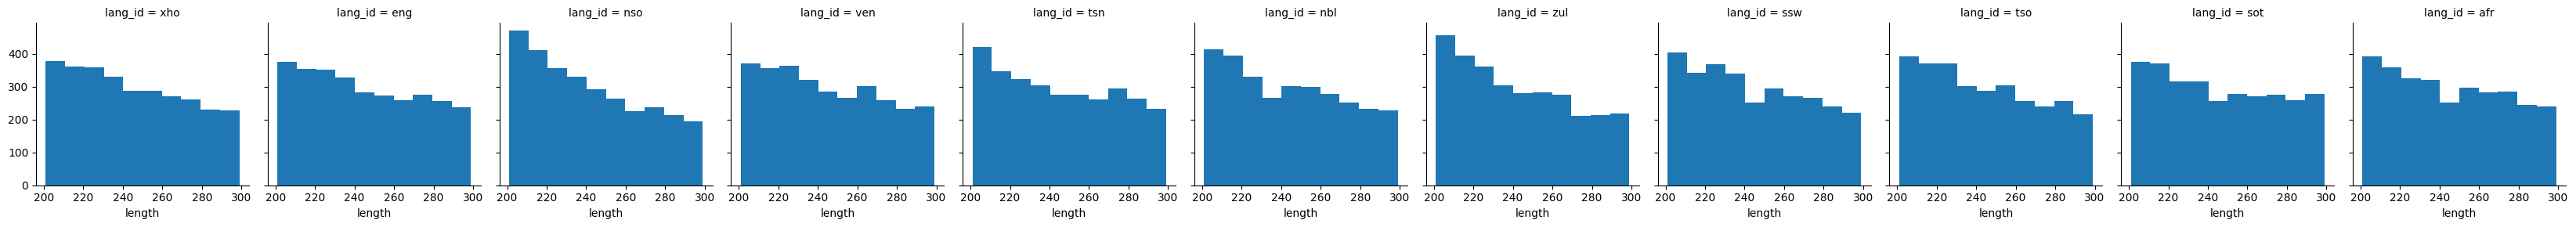

In [83]:
# checking the length of each language
train_df['length'] = train_df['text'].str.len()

# Create Subplots for each class
tweet= sns.FacetGrid(train_df,col="lang_id" )
tweet = tweet.map(plt.hist, 'length')
tweet = plt.show()

## Feature Engineering


### Classifying the independent and dependent variables

In [84]:
#text data is the independent variable of the training set
X = train_df["text"] 
#lang_id is the dependent variable of the training set
Y = train_df["lang_id"]
#text data is the independent variable of the test set
X_tst = test_df['text'] 

### Text Preprocessing
#### Cleaning Data

*  Convert words to lower Case  
*  Removing punctuations

In [85]:
# creating a list for appending the preprocessed text
datafm_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        datafm_list.append(text)

In [86]:
# creating a list for appending the preprocessed text in the text data set
datafm_list1 = []
# iterating through all the text
for text in X_tst:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        datafm_list1.append(text)

### Vectorization

In [87]:
count_v = CountVectorizer()
X = count_v.fit_transform(X)

In [88]:
# Example: Create a DataFrame 'df' with a column 'text' and 'target'
data = {'text': ['sentence 1', 'sentence 2', 'sentence 3'],
        'target': ['label_A', 'label_B', 'label_A']}

df = pd.DataFrame(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Initialize the CountVectorizer
cv = CountVectorizer()

# Fit and transform the training data
X_train_transformed = cv.fit_transform(X_train)

# Transform the test data using the previously defined CountVectorizer
X_test_transformed = cv.transform(X_test)

# Display the shape of the transformed test data
print("Transformed Test Data Shape:", X_test_transformed.shape)


Transformed Test Data Shape: (1, 1)


### Data Preprocessing

In [89]:
def preprocess_data(train_df, test_df):
    # Initializing the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fitting the vectorizer on the training data
    vectorizer.fit(train_df['text'])

    # Transforming the training and test data using the fitted vectorizer
    train_features = vectorizer.transform(train_df['text'])
    test_features = vectorizer.transform(test_df['text'])

    return train_features, test_features, vectorizer

## Train- Test Split

In [90]:
train_features, test_features, vectorizer = preprocess_data(train_df, test_df)
X_train, X_val, y_train, y_val = train_test_split(train_features, train_df['lang_id'], test_size=0.2, random_state=42)

## Training and Evaluation

### Logistic Regression Classifier

In [91]:
logReg_model = LogisticRegression()

# Fit the classifier to the training data
logReg_model.fit(X_train, y_train)

# Make predictions on the validation data
logReg_preds = logReg_model.predict(X_val)

# Evaluate the model using F1 score
logReg_f1 = f1_score(y_val, logReg_preds, average='weighted')

# Print the F1 score
print("Logistic Regression F1 Score:", logReg_f1)

Logistic Regression F1 Score: 0.994246281483686


### K-Nearest Neighbors (KNN) Classifier

In [92]:
KNN_model = KNeighborsClassifier()

# Fit the classifier to the training data
KNN_model.fit(X_train, y_train)

# Make predictions on the validation data
KNN_preds = KNN_model.predict(X_val)

# Evaluate the model using F1 score
KNN_f1 = f1_score(y_val, KNN_preds, average='weighted')

# Print the F1 score
print("KNN F1 Score:", KNN_f1)

KNN F1 Score: 0.9593450685034197


### Support Vector Machine Classifier

In [93]:
SVM = SVC()

# Fit the classifier to the training data
SVM.fit(X_train, y_train)

# Make predictions on the validation data
SVM_predictions = SVM.predict(X_val)

# Evaluate the model using F1 score
SVM_f1 = f1_score(y_val, SVM_predictions, average='weighted')

# Print the F1 score
print("SVM F1 Score:", SVM_f1)

SVM F1 Score: 0.9942650475719713


### Naive Bayes Classifier

In [94]:
NaiveB = MultinomialNB()

# Fit the classifier to the training data
NaiveB.fit(X_train, y_train)

# Make predictions on the validation data
NaiveB_predictions = NaiveB.predict(X_val)

# Evaluate the model using F1 score
NaiveB_f1 = f1_score(y_val, NaiveB_predictions, average='weighted')

# Print the F1 score
print("Naive Bayes F1 Score:", NaiveB_f1)

Naive Bayes F1 Score: 0.9980299054262277


### Decision Tree Classifier

In [95]:
# Instantiate the Decision Tree classifier
Decision_tree = DecisionTreeClassifier()

# Fit the classifier to the training data
Decision_tree.fit(X_train, y_train)

# Make predictions on the validation data
Decision_tree_predictions = Decision_tree.predict(X_val)

# Evaluate the model using F1 score
Decision_tree_f1 = f1_score(y_val, Decision_tree_predictions, average='weighted')

# Print the F1 score
print("Decision Tree Classifier F1 Score:", Decision_tree_f1)


Decision Tree Classifier F1 Score: 0.9474261628165818


### Random Forest Classifier

In [96]:
# Instantiate the Random Forest classifier
random_forest = RandomForestClassifier()

# Fit the classifier to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the validation data
rf_predictions = random_forest.predict(X_val)

# Evaluate the model using F1 score
rf_f1 = f1_score(y_val, rf_predictions, average='weighted')

# Print the F1 score
print("Random Forest Classifier F1 Score:", rf_f1)


Random Forest Classifier F1 Score: 0.9856893477722262


### LinearSVC Classifier

In [97]:

# Instantiate the Linear SVC classifier
linear_svc = LinearSVC()

# Fit the classifier to the training data
linear_svc.fit(X_train, y_train)

# Make predictions on the validation data
svc_predictions = linear_svc.predict(X_val)

# Evaluate the model using F1 score
svc_f1 = f1_score(y_val, svc_predictions, average='weighted')

# Print the F1 score
print("Linear SVC Classifier F1 Score:", svc_f1)


c:\Users\hlaka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVC Classifier F1 Score: 0.9965130432004637


## Generate predictions on the test set

In [101]:
# Converting the test data into TF-IDF vectors
X_test = vectorizer.transform(test_df['text'])

# Generating predictions on the best performing model
test_predictions = NaiveB.predict(X_test)

## Creating a csv for submission

In [102]:
# Creating a submission dataframe with 'index' and 'lang_id' columns
submission_df = pd.DataFrame({'index': test_df['index'], 'lang_id': test_predictions})

submission_df.to_csv('Submission.csv', index=False)